In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
train_df= pd.read_csv('/content/drive/My Drive/project/hindiDataCleaned.csv', engine='python')

In [0]:
train_df.head(10)

,Unnamed: 0,headline,summary,article
0,3,रिम करेगा दो हजार कर्मचारियों की छंटनी,sostok ब्लैकबेरी हैंडसेट बनाने वाली कनाडा की क...,ब्लैकबेरी हैंडसेट बनाने वाली कनाडा कंपनी रिसर्...
1,7,अमेरिका : राष्ट्रपति पद की उम्मीदवार हिलेरी क्...,sostok श्रद्धांजलि सभा के दौरान अचानक खराब हुई...,अमेरिका राष्ट्रपति पद डेमोक्रेटिक पार्टी उम्मी...
2,8,देश के सर्वश्रेष्ठ स्पिनरों में से एक है हरभजन...,sostok पूर्व भारतीय कप्तान अनिल कुंबले का मानन...,पूर्व भारतीय क्रिकेट कप्तान अनिल कुंबले मानना ...
3,9,इंडिगो के स्टाफ ने दिल्ली एयरपोर्ट पर पैसेंजर ...,sostok इंडिगो के ग्राउंड स्टाफ ने यात्री से की...,इंडिगो एयरलाइन प्रेसीडेंट डायरेक्टर आदित्य घोष...
4,10,नव्या नवेली के साथ दोस्ती पर जावेद जाफरी के बे...,sostok मीजान जाफरी ने किया खुलासा नव्या नंदा क...,संजय लीला भंसाली फिल्म मलाल बॉलीवुड कदम रखने म...
5,12,इस्लामिक धर्मगुरु ने रियल एस्टेट में किया 100 ...,sostok ज़ाकिर नाइक के बैंक खातों की एनआईए जांच...,विवादित इस्लामिक प्रचारक ज़ाकिर नाइक गैर सरकार...
6,13,राष्ट्रपति 9 दिवसीय दौरे पर सेशेल्स व द. अफ्री...,sostok राष्ट्रपति प्रतिभा पाटील रविवार सुबह से...,राष्ट्रपति प्रतिभा पाटील रविवार सुबह सेशेल्स द...
7,17,"पीएम मोदी मिले बीजेपी के ओबीसी सांसदों से, सरक...",sostok कहा जब संसद नहीं चल रही हो तो अपने क्षे...,उन्होंने क्षेत्रों समस्याओं लेकर केंद्रीय मंत्...
8,18,Bharat New Poster: सलमान खान दिखे बुजुर्ग के ग...,sostok सलमान खान दिखे बुजुर्ग के गेटअप में उनक...,खान तस्वीर ट्वीट लिखा जितने सफेद बाल मेरे सिर ...
9,23,सोमालियाई लुटेरों ने 17 भारतीयों को किया रिहा,sostok फरवरी में इटली के इस जहाज का अपहरण किया...,रोम सोमालियाई समुद्री लुटेरों इटली तेल भरे जहा...


In [0]:
train_df['summary'][13]

'sostok गुजरात के मुख्यमंत्री नरेंद्र मोदी ने कहा कि उत्तराखंड पर जो प्राकृतिक विपदा आई है वह राष्ट्रीय आपदा जैसी है उन्होंने कहा हम इस संकट से निबटने में राज्य सरकार को जो भी मदद कर सकते हैं करेंगे eostok'

In [0]:
fp= open('/content/drive/My Drive/project/hi.tsv', "r", encoding="utf-8")
content= fp.read()

lines= content.split(']')
# s, value= lines[0].split('[')
# print( lines[0].split('['))

embeddings_index = {}
for line in lines:
  if len(line.split()) > 1:
    s, value= line.split('[')
    num, word= s.split()
    embedding= value.split()
    embedding= [float(x) for x in embedding] 
    embeddings_index[word] = embedding
print(len(embeddings_index))

30393


In [0]:
print(len(embeddings_index['के']))

300


In [0]:
from sklearn.model_selection import train_test_split

x_tr,x_test,y_tr,y_test = train_test_split(train_df['article'],train_df['summary'],test_size=0.1,random_state=0,shuffle=True) 

x_tr,x_val,y_tr,y_val = train_test_split(x_tr,y_tr,test_size=0.1,random_state=0,shuffle=True)

In [0]:
x_tr

30627    गैलप शुक्रवार आए ताजा सर्वे मुताबिक अमेरिकी रा...
45967    अमरनाथ यात्रियों हमले बहाने बीजेपी सत्ता सहयोग...
34197    भारत स्टार बल्लेबाज सचिन तेंदुलकर काफी समय जार...
17005    क्यूबा लिंग परिवर्तन कराने वालों संख्या गई जान...
28704    दिल्ली मेट्रो पूर्व प्रमुख मेट्रो मैन नाम मशहू...
                               ...                        
1086     नागरिकता संशोधन कानून खिलाफ देश जगह प्रदर्शन ब...
7173     भारत स्टार टेनिस खिलाड़ी सोमदेव देवबर्मन पेशेव...
25009    कारोबारी सप्ताह तीसरे दिन कारोबार अंत हल्की गि...
17823    माल्या अदालत बाहर पत्रकारों बताया मैं अदालत बच...
54434    बिहार मुख्यमंत्री नीतीश कुमार चलाए दहेज बाल वि...
Name: article, Length: 45452, dtype: object

In [0]:
x_val.shape

(5051,)

In [0]:
x_tr2= list(x_tr)
x_val2= list(x_val)
x_test2= list(x_test)

In [0]:
print('Training data: ', len(x_tr))
print('Validation data: ', len(x_val))
print('Testing data:', len(x_test))

Training data:  45452
Validation data:  5051
Testing data: 5612


In [0]:
print('Training data: ', len(x_tr2))
print('Validation data: ', len(x_val2))
print('Testing data:', len(x_test2))

Training data:  45452
Validation data:  5051
Testing data: 5612


In [0]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
# from attention import AttentionLayer
import warnings

from keras import backend as K 
from keras.initializers import Constant

Using TensorFlow backend.


In [0]:
max_len_text= 400
max_len_summary= 35

In [0]:
#before_sample=x_tr[80186]
# Tokenizer library in keras that maps words to integers, integers to words
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))
x_voc_size   =  len(x_tokenizer.word_index) +1

# convert text sequences into integer sequences
x_tr_int    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_int   =   x_tokenizer.texts_to_sequences(x_val)
x_test_int = x_tokenizer.texts_to_sequences(x_test)

# padding zero upto maximum length
x_tr_int    =   pad_sequences(x_tr_int,  maxlen=max_len_text, padding='post') 
x_val_int   =   pad_sequences(x_val_int, maxlen=max_len_text, padding='post')
x_test_int   =   pad_sequences(x_test_int, maxlen=max_len_text, padding='post')

print(len(x_tr_int))
# after_sample=x_tr[88280]

45452


In [0]:
after_sample=x_tr_int[45]
print(after_sample)

[  174    56  1878   287  1878  4759  1710   362  4977   933   105  1710
  5010  1093    31   328   341  4050 11810    34  2818   274   328  1710
   174  1738    38  5010  5011  5290  2456  2735  1095    35   193  1470
    34 12566   216  3623   218  1710   430   127   341  1710   174 28399
  1591  8763  1127  1547  2561  3044   408   789   829 28400 79572  7824
 15968 95214   309 17591  1710   174  1854  2731   239 28399   341  1710
   174   832   282  1591  1710  5010   418    78  1710  1281    26  1710
  5010   341  1710   174 11810    78  2818   328   930   189   403    34
  1710  1281  5010 11231    55 14587 28399   341  1710   174   333 95215
 21232   680 95216 11052 20553  1931  1521 28399  1434  2144 54381    26
   448 21233   362   119  1710   174  1699   230   320  1841  1878   517
   218  1739  2457  3423  2340 25098  1710  1041  1854    57  1973 95217
 54382  1710  1878 54382  1739  4565]


In [0]:
#print("Aricle Before: \n"+str(before_sample[0:250]))
print()
print("Article After: \n"+str(after_sample[0:250]))


Article After: 
[  174    56  1878   287  1878  4759  1710   362  4977   933   105  1710
  5010  1093    31   328   341  4050 11810    34  2818   274   328  1710
   174  1738    38  5010  5011  5290  2456  2735  1095    35   193  1470
    34 12566   216  3623   218  1710   430   127   341  1710   174 28399
  1591  8763  1127  1547  2561  3044   408   789   829 28400 79572  7824
 15968 95214   309 17591  1710   174  1854  2731   239 28399   341  1710
   174   832   282  1591  1710  5010   418    78  1710  1281    26  1710
  5010   341  1710   174 11810    78  2818   328   930   189   403    34
  1710  1281  5010 11231    55 14587 28399   341  1710   174   333 95215
 21232   680 95216 11052 20553  1931  1521 28399  1434  2144 54381    26
   448 21233   362   119  1710   174  1699   230   320  1841  1878   517
   218  1739  2457  3423  2340 25098  1710  1041  1854    57  1973 95217
 54382  1710  1878 54382  1739  4565]


In [0]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))
y_voc_size  =   len(y_tokenizer.word_index) +1

# same for summaries
y_tr_int    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_int   =   y_tokenizer.texts_to_sequences(y_val) 
#y_test_int= y_tokenizer.texts_to_sequences(y_test)

y_tr_int    =   pad_sequences(y_tr_int, maxlen=max_len_summary, padding='post')
y_val_int   =   pad_sequences(y_val_int, maxlen=max_len_summary, padding='post')


In [0]:
y_tokenizer.word_counts['sostok'],len(y_tr_int)

(45452, 45452)

In [0]:
import numpy as np

In [0]:
# create embedding matrix to be used in model
embedding_dim= 300

x_embedding_matrix= np.zeros((x_voc_size, embedding_dim))

for word, i in x_tokenizer.word_index.items():
  if i> x_voc_size:
    continue
  embedding_vector= embeddings_index.get(word)

  if embedding_vector is not None:
    x_embedding_matrix[i]= embedding_vector

In [0]:
# embedding matrix for decoder to be used in model
y_embedding_matrix= np.zeros((y_voc_size, embedding_dim))
for word, i in y_tokenizer.word_index.items():
  if word == 'sostok':
    embedding_vector = np.array(np.random.uniform(-1.0, 1.0, embedding_dim)) 
  if word == 'eostok':
    embedding_vector = np.array(np.random.uniform(-1.0, 1.0, embedding_dim)) 
    
  if i> y_voc_size:
    continue
  embedding_vector= embeddings_index.get(word)

  if embedding_vector is not None:
    y_embedding_matrix[i]= embedding_vector

In [0]:
print(len(y_embedding_matrix[10]))

300


In [0]:
print(x_embedding_matrix.shape)
print(y_embedding_matrix.shape)

(127576, 300)
(42329, 300)


In [0]:
latent_dim = 300

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,embeddings_initializer= Constant(x_embedding_matrix), trainable=False)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = Bidirectional(LSTM(latent_dim,return_sequences=True,return_state=True))
encoder_output1, forward_h, forward_c, backward_h, backward_c = encoder_lstm1(enc_emb)

#LSTM 2 
# encoder output 1 is fed as input to the next lstm
encoder_lstm2 = Bidirectional(LSTM(latent_dim,return_sequences=True,return_state=True))
encoder_output2, forward_h2, forward_c2, backward_h2, backward_c2 = encoder_lstm2(encoder_output1)

#LSTM 3 
# encoder output 2 fed as input to next lstm 
encoder_lstm3=Bidirectional(LSTM(latent_dim, return_state=True, return_sequences=True))
encoder_output3, forward_h3, forward_c3, backward_h3, backward_c3 = encoder_lstm3(encoder_output2)

#LSTM 4
encoder_lstm4=Bidirectional(LSTM(latent_dim, return_state=True, return_sequences=True))
encoder_outputs, forward_h4, forward_c4, backward_h4, backward_c4 = encoder_lstm2(encoder_output3)
state_h = Concatenate()([forward_h4, backward_h4])
state_c = Concatenate()([forward_c4, backward_c4])
encoder_states = [state_h, state_c]
print(state_h.shape)
print(state_c.shape)
#encoder_outputs, state_h, state_c= encoder_lstm4(encoder_output3) 


(None, 600)
(None, 600)


In [0]:
import sys
sys.path.append('/content/drive/My Drive')
from attention import AttentionLayer

In [0]:
# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer=  Embedding(y_voc_size, latent_dim,embeddings_initializer= Constant(y_embedding_matrix), trainable=False)
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM1
# Using encoder_states as decoder's initial state
decoder_lstm1 = LSTM(2*latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm1(dec_emb,initial_state=encoder_states) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 


In [0]:
# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

# early stopping 
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 400, 300)     38272800    input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   [(None, 400, 600), ( 1442400     embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) [(None, 400, 600), ( 2162400     bidirectional[0][0]              
                                                                 bidirectional_2[0][0]        

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
history=model.fit([x_tr_int,y_tr_int[:,:-1]], y_tr_int.reshape(y_tr_int.shape[0],
                                                               y_tr_int.shape[1], 1)[:,1:] ,
                  epochs=10,batch_size=64, 
                  validation_data=([x_val_int,y_val_int[:,:-1]], 
                                   y_val_int.reshape(y_val_int.shape[0],y_val_int.shape[1], 1)[:,1:]))

Epoch 1/10
711/711 [==============================] - 1238s 2s/step - loss: 4.7895 - val_loss: 4.2454
Epoch 2/10
711/711 [==============================] - 1244s 2s/step - loss: 4.1302 - val_loss: 4.0152
Epoch 3/10
711/711 [==============================] - 1246s 2s/step - loss: 3.8782 - val_loss: 3.8929
Epoch 4/10
711/711 [==============================] - 1247s 2s/step - loss: 3.6963 - val_loss: 3.8374
Epoch 5/10
711/711 [==============================] - 1248s 2s/step - loss: 3.5408 - val_loss: 3.7943
Epoch 6/10
711/711 [==============================] - 1250s 2s/step - loss: 3.3994 - val_loss: 3.7651
Epoch 7/10
711/711 [==============================] - 1249s 2s/step - loss: 3.2640 - val_loss: 3.7665
Epoch 8/10
164/711 [=====>........................] - ETA: 15:21 - loss: 3.0246

In [0]:
from tensorflow.keras.models import load_model
#model = load_model('/content/drive/My Drive/my_model3.h5',custom_objects={'AttentionLayer': AttentionLayer})
model.save('/content/drive/My Drive/project/my_model_attn_beam.h5')  # creates a HDF5 file 'my_model.h5'
#path = '/content/drive/My Drive/my_model4.h5'
#model.save(path)

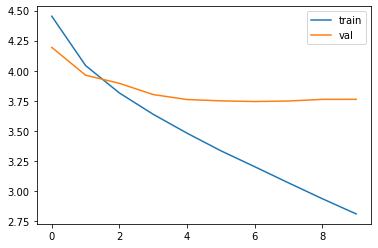

In [0]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='val')  
pyplot.legend()
pyplot.show()

In [0]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [0]:
import copy
#2 ideas : threshold value if less, remove and if end token found, remove and store in another list and then merge at the end

def beam_search(encoder_model,decoder_model, src_input, k, sequence_max_len):

    e_out, e_h, e_c = encoder_model.predict(src_input)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['sostok']

    start = True
    
    #print(k_beam)
    # l : point on target sentence to predict
    all_k_beams = [[[],1]]
    load_hidden={}
    end_sentence = []
    for l in range(sequence_max_len):

        if(start==True):

          start=False
          output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
          possible_k = output_tokens[0, -1, :].argsort()[-k:][::-1]
          #print("Possible k in start: "+str((possible_k)))
          dummy_list = []
          begin=True
          for cand in all_k_beams:
            
            for curr_k in possible_k:
              #print("Cand: "+str(cand)+" curr_k: "+str(curr_k))
              #print(cand[0]+[curr_k])
              #print(cand[1]+np.log(output_tokens[0, -1, :][curr_k]))
              curr = [cand[0]+[curr_k],cand[1]-np.log(output_tokens[0, -1, :][curr_k])]
              
              dummy_list.append(curr)
              if(begin==True):
                #target_seq = np.zeros((1,1))
                #target_seq[0, 0] = curr_k
                load_hidden[curr_k] = [h,c]
            begin=False
          all_k_beams = dummy_list[:]
          #print(all_k_beams)
          prev_target_seq = copy.deepcopy(possible_k)
          #print("load_hidden: "+str(load_hidden.keys()))
        else:
          #print("l is: "+str(l))
          #print("In else, prev target seq: "+str(prev_target_seq))
          for target_seq1 in prev_target_seq:
            #print("Prev index: "+str(target_seq1))
            target_seq = np.zeros((1,1))
            target_seq[0, 0] = target_seq1

            output_tokens, h, c = decoder_model.predict([target_seq] + [e_out,load_hidden[target_seq1][0],load_hidden[target_seq1][1]])

            possible_k = output_tokens[0, -1, :].argsort()[-k:][::-1]
            #print("Possible k not in start: "+str((possible_k)))

            dummy_list = []
            begin = True
            for cand in all_k_beams:
              for curr_k in possible_k:
                if(cand[0][-1]==target_seq1 and len(cand[0])==l):
                  #print("Here I am")
                  #print("Looking at cand: "+str(cand[0]))
                  ended=False
                  curr = [cand[0]+[curr_k],cand[1]-np.log(output_tokens[0, -1, :][curr_k])]
                  if(curr_k in reverse_target_word_index):
                    sampled_token = reverse_target_word_index[curr_k]
                    if(sampled_token=='end'):
                      end_sentence.append(curr)
                      ended=True
                  if(ended==False):
                    dummy_list.append(curr)
                if(begin==True):
                  #target_seq = np.zeros((1,1))
                  #target_seq[0, 0] = curr_k
                  load_hidden[curr_k] = [h,c]
              begin=False
            all_k_beams +=dummy_list
            #print(all_k_beams)
            prev_target_seq = copy.deepcopy(possible_k)
        
        # top k
    #print(end_sentence)
    all_k_beams += end_sentence
    all_k_beams.sort(key=lambda r:r[1])
    k_beam = all_k_beams[-k:]
    #k_beam = k_beam[::-1]
    return k_beam

In [0]:
len(reverse_source_word_index)

127575

In [0]:
# Inference Phase 

"""
After training, the model is tested on new source sequences
for which the target sequence is not known 
setting up inference architecture for it 
"""

# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(2*latent_dim,))
decoder_state_input_c = Input(shape=(2*latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim*2))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm1(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])


In [0]:
def decode_sequence2(input_seq):
    # Encode the input as state vectors.
    decoded_sentence = beam_search(encoder_model,decoder_model, input_seq, 3, 35)
    return decoded_sentence


In [0]:
def seq2summary(input_seq):
  newString=''
  for i in input_seq:
      if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
          newString=newString+reverse_target_word_index[i]+' '
  return newString

def seq2text(input_seq):
  # print(input_seq)
  newString=''
  for i in input_seq:
      if(i!=0):
          newString=newString+reverse_source_word_index[i]+' '
  return newString

In [0]:
def get_sentence(model_summary):
  all_Sentence = []
  for int_sent in model_summary:
    sent = int_sent[0]
    decoded_sentence= ''
    for sampled_token_index in sent:
      if sampled_token_index in reverse_target_word_index:
        sampled_token = reverse_target_word_index[sampled_token_index]
      else:
        sampled_token="UNK"
            
      if(sampled_token!='eostok'):
        decoded_sentence += ' '+sampled_token
      else:
        # print("broken")
        break
    #print(str(decoded_sentence)+ " , "+str(int_sent[1]))
    all_Sentence.append([decoded_sentence,int_sent[1]])
  return all_Sentence 

In [0]:
!pip install rouge

In [0]:
from rouge import Rouge

In [4]:
!pip3 install --upgrade nltk 

     |████████████████████████████████| 1.4MB 4.9MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434675 sha256=f478af2187552134eb02f15c577444d8336b48b445cc1067fb10bcae1d316e82
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk.translate import AlignedSent, Alignment
from nltk.translate.meteor_score import meteor_score

In [3]:
#print summaries generated
print("Writing results to file\n\n")
fp = open("/content/drive/My Drive/project/average_rogue_beamserach.txt",'w')

average_rouge1=0.0
average_rouge2=0.0
average_rougel=0.0
average_meteor=0.0
n=0

for i in range(100):

  article= seq2text(x_val_int[i])

  originalSummary = seq2summary(y_val_int[i])
 

  predictedSummaryall = get_sentence(decode_sequence2(x_val_int[i].reshape(1,max_len_text)))
  predictedSummary = predictedSummaryall[0][0]
  

  rouge = Rouge()
  scores = rouge.get_scores(predictedSummary, originalSummary)
  rouge_1= scores[0]['rouge-1']['f']
  rouge_2= scores[0]['rouge-2']['f']
  rouge_l= scores[0]['rouge-l']['f']
  
  average_rouge1= average_rouge1 + rouge_1
  average_rouge2= average_rouge2 + rouge_2
  average_rougel= average_rougel + rouge_l
  average_meteor= round(meteor_score([originalSummary],predictedSummary ),4)

  

average_rouge1 = average_rouge1/n
average_rouge2 = average_rouge2/n
average_rougel = average_rougel/n
average_meteor = average_meteor/n

fp.write("\n\nAverage rouge 1: "+ str(average_rouge1))
fp.write("\n")
fp.write("Average rouge 2: " + str(average_rouge2))
fp.write("\n")
fp.write("Average rouge l: "+ str(average_rougel))
fp.write("\n")
fp.write("Average meteor l: "+ str(average_meteor))
fp.write("\n")


print("Average rouge 1: "+ str(average_rouge1))
print("Average rouge 2: " + str(average_rouge2))
print("Average rouge l: "+ str(average_rougel))
print("Average meteor: "+ str(average_meteor))

fp.close()


Writing results to file


Average rouge 1: 0.2853363588946281
Average rouge 2: 0.0572380905215422
Average rouge l: 0.2528962914677641
Average meteor: 0.2465
